In [100]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [101]:
from pandas import *
from matplotlib.pyplot import plot, figure, imshow
from numpy.random import shuffle
import numpy
from IPython.display import clear_output

Creating a maze with size of 8,8.

(17, 17)


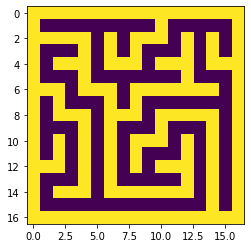

In [102]:
def make_maze(w = 16, h = 8):
    vis = [[0] * w + [1] for _ in range(h)] + [[1] * (w + 1)]
    ver = [["10"] * w + ['1'] for _ in range(h)] + [[]]
    hor = [["11"] * w + ['1'] for _ in range(h + 1)]
 
    def walk(x, y):
        vis[y][x] = 1
 
        d = [(x - 1, y), (x, y + 1), (x + 1, y), (x, y - 1)]
        shuffle(d)
        for (xx, yy) in d:
            if vis[yy][xx]: continue
            if xx == x: hor[max(y, yy)][x] = "10"
            if yy == y: ver[y][max(x, xx)] = "00"
            walk(xx, yy)
 
    walk(numpy.random.randint(w), numpy.random.randint(h))
 
    s = ""
    for (a, b) in zip(hor, ver):
        s += ''.join(a + ['\n'] + b + ['\n'])
        
    M=[]
    for line in s.split("\n"):
        if line!="":
            R=[]
            for e in line:
                R.append(int(e))
            M.append(R)
    return M
 
maze=numpy.array(make_maze(8,8))
imshow(maze)
print(maze.shape)


Applying created policy to the maze.

2148


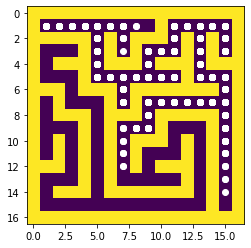

In [103]:
def applyComplexPolicyToMaze(maze,localpolicy):
    xm=[0,1,0,-1]
    ym=[-1,0,1,0]
    currentX=1
    currentY=1
    targetX=maze.shape[0]-2
    targetY=maze.shape[1]-2

    x=list()
    y=list()
    actionTaken=list()

    while not(currentX==targetX and currentY==targetY):
        action=numpy.random.choice([0,1,2,3],p=localpolicy[currentX][currentY])

        tx=currentX+xm[action]
        ty=currentY+ym[action]
        if maze[tx][ty]==0:
            x.append(currentX)
            y.append(currentY)
            actionTaken.append(action)

            currentX=tx
            currentY=ty
    return x,y,actionTaken

policy=numpy.ones((17,17,4))*0.25
x,y,a=applyComplexPolicyToMaze(maze,policy)
imshow(maze)
plot(y,x,'ow')
print(len(a))

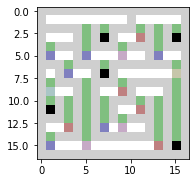

In [104]:
from matplotlib.pyplot import subplot

def curatePolicy(maze,policy):
    xm=[0,1,0,-1]
    ym=[-1,0,1,0]
    for x in range(maze.shape[0]):
        for y in range(maze.shape[1]):
            if maze[x][y]==0:
                for d in range(4):
                    if maze[x+xm[d]][y+ym[d]]==1:
                        policy[x][y][d]=0.0
                policy[x][y]/=policy[x][y].sum()
    return policy

policy=numpy.ones((maze.shape[0],maze.shape[1],4))*0.25
policy=curatePolicy(maze,policy)
subplot(1,2,2)
imshow(policy)

Storing policy in a dict.

In [105]:
policy=dict()
for x in range(17):
    for y in range(17):
        if maze[x][y]==0:
            policy[tuple([x,y])]=numpy.array([0.25,0.25,0.25,0.25])
print(policy[tuple([3,1])])

[0.25 0.25 0.25 0.25]


Running the policy with reinforcement learning.

In [106]:
def ReinforcementAl(gen):
    generation = gen
    nlist= []
    nlist.clear()
    policy=numpy.ones((maze.shape[0],maze.shape[1],4))*0.25
    learningRate=0.1
    steps=[]

    for reps in range(generation):
        x,y,a=applyComplexPolicyToMaze(maze,policy)
        for i in range(len(a)):
            policy[x[i]][y[i]][a[i]]+=learningRate
        for ii in range(maze.shape[0]):
            for iii in range(maze.shape[1]):
                policy[ii][iii]/=policy[ii][iii].sum()
        nlist.append(len(a))
        clear_output(wait=True)
        print(f"Generation:{reps}||steps:{len(a)}")
        steps.append(len(a))
    print(f"Min: {numpy.min(nlist)}")
    print(f"Max: {numpy.max(nlist)}")
    print(f"Mean: {numpy.mean(nlist)}")

    imshow(maze)
    plot(y,x,'ow')
    figure()
    plot(steps)
    figure()
    imshow(policy)


Generation:49||steps:578
Min: 196
Max: 4414
Mean: 983.8


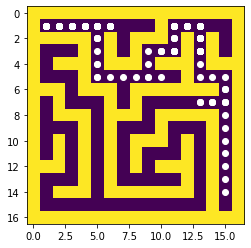

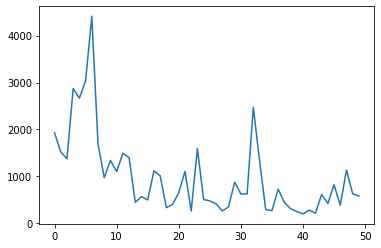

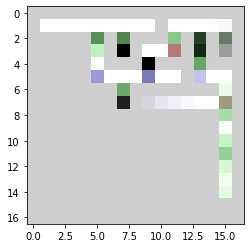

In [107]:
ReinforcementAl(50)

Generation:99||steps:82
Min: 46
Max: 5134
Mean: 629.88


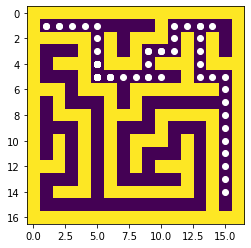

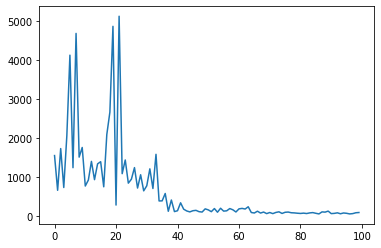

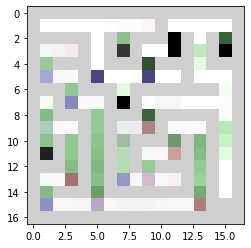

In [108]:
ReinforcementAl(100)

Generation:999||steps:36
Min: 36
Max: 1998
Mean: 57.44


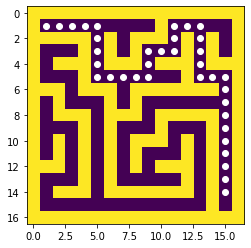

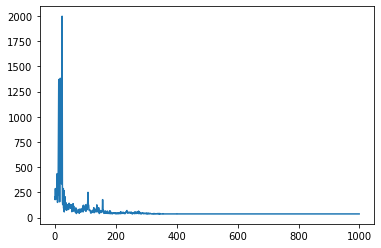

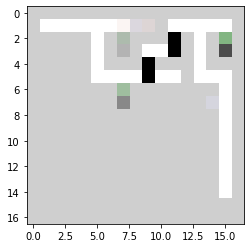

In [109]:
ReinforcementAl(1000)